In [1]:
# debugging and formatter
from IPython.core.debugger import set_trace

%load_ext nb_black

import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import pickle
import time

%matplotlib inline

<IPython.core.display.Javascript object>

In [37]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=3,
    n_redundant=0,
    n_informative=3,
    n_repeated=0,
    n_classes=4,
    weights=[0.025, 0.025, 0.05, 0.9],
    flip_y=0,
    random_state=7,
)

<IPython.core.display.Javascript object>

In [38]:
X.shape

(1000, 3)

<IPython.core.display.Javascript object>

In [39]:
X

array([[ 0.58527868,  1.38088173,  1.53482503],
       [ 0.55203004,  0.96247886,  0.70148993],
       [ 2.47193231,  1.67223432,  2.99983425],
       ...,
       [ 1.20308665,  1.00335472,  1.75248831],
       [ 1.91813814, -1.21654868,  0.45553477],
       [ 0.21928856,  2.75785326,  2.94193713]])

<IPython.core.display.Javascript object>

In [40]:
np.unique(y)

array([0, 1, 2, 3])

<IPython.core.display.Javascript object>

In [41]:
from collections import Counter

counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100
    print(f"Class={k}, n={v} ({dist}%)")

Class=3, n=900 (90.0%)
Class=2, n=50 (5.0%)
Class=1, n=25 (2.5%)
Class=0, n=25 (2.5%)


<IPython.core.display.Javascript object>

<BarContainer object of 4 artists>

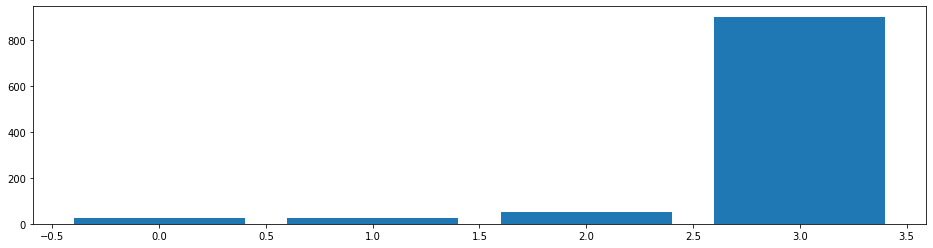

<IPython.core.display.Javascript object>

In [30]:
plt.figure(1, figsize=(16, 4))
plt.bar(counter.keys(), counter.values())

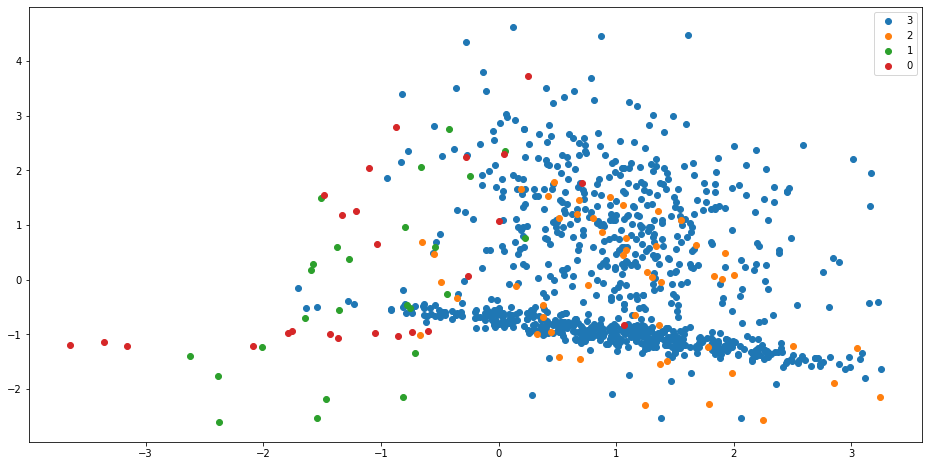

<IPython.core.display.Javascript object>

In [31]:
# scatter plot of examples by class label
plt.figure(1, figsize=(16, 8))
for label, _ in counter.items():
    row = np.where(y == label)[0]
    plt.scatter(X[row, 0], X[row, 1], label=str(label))
plt.legend()

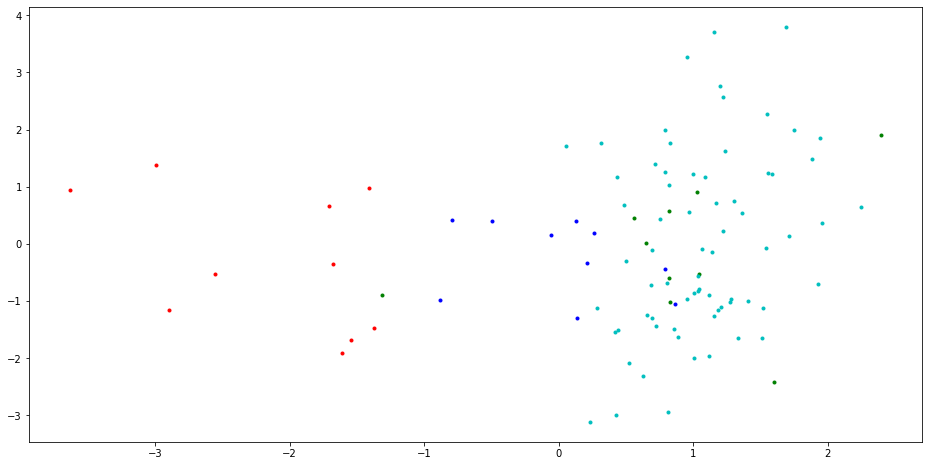

<IPython.core.display.Javascript object>

In [9]:
separable = False
while not separable:
    samples = make_classification(
        n_samples=100,
        n_features=3,
        n_redundant=0,
        n_informative=3,
        n_repeated=0,
        n_classes=4,
        weights=[0.1, 0.1, 0.1, 0.7],
        flip_y=0,
    )
    one = samples[0][samples[1] == 0]
    two = samples[0][samples[1] == 1]
    three = samples[0][samples[1] == 2]
    four = samples[0][samples[1] == 3]
    separable = any(
        [
            (
                one[:, k].max() < two[:, k].min()
                and one[:, k].max() < three[:, k].min()
                and one[:, k].max() < four[:, k].min()
            )
            or (
                two[:, k].max() < one[:, k].min()
                and two[:, k].max() < three[:, k].min()
                and two[:, k].max() < four[:, k].min()
            )
            or (
                three[:, k].max() < one[:, k].min()
                and three[:, k].max() < two[:, k].min()
                and three[:, k].max() < four[:, k].min()
            )
            or (
                four[:, k].max() < one[:, k].min()
                and four[:, k].max() < two[:, k].min()
                and four[:, k].max() < three[:, k].min()
            )
            for k in range(2)
        ]
    )

plt.figure(1, figsize=(16, 8))
plt.plot(one[:, 0], one[:, 1], "r.")
plt.plot(two[:, 0], two[:, 1], "b.")
plt.plot(three[:, 0], three[:, 1], "g.")
plt.plot(four[:, 0], four[:, 1], "c.")

In [21]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=[900, 50, 100, 100], centers=None, n_features=3, random_state=7
)

<IPython.core.display.Javascript object>

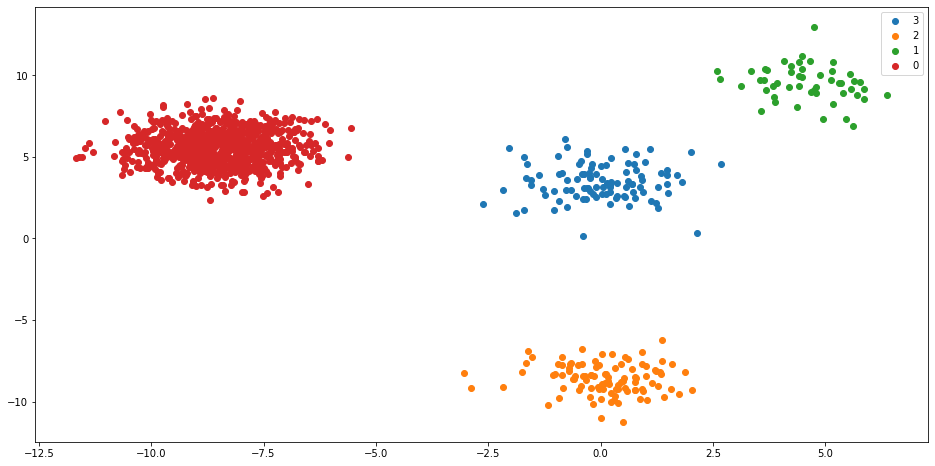

<IPython.core.display.Javascript object>

In [22]:
# scatter plot of examples by class label
plt.figure(1, figsize=(16, 8))
for label, _ in counter.items():
    row = np.where(y == label)[0]
    plt.scatter(X[row, 0], X[row, 1], label=str(label))
plt.legend()

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

<IPython.core.display.Javascript object>

In [23]:
# define model
model = DecisionTreeClassifier()
scores = cross_validate(model, X, y, cv=6, n_jobs=-1, scoring="f1_macro")

<IPython.core.display.Javascript object>

In [24]:
scores

{'fit_time': array([0.00097275, 0.00109792, 0.00089598, 0.00107503, 0.00092268,
        0.00097489]),
 'score_time': array([0.00076914, 0.00087714, 0.00092101, 0.00071311, 0.00091004,
        0.00072408]),
 'test_score': array([0.97771836, 1.        , 1.        , 0.97771836, 1.        ,
        1.        ])}

<IPython.core.display.Javascript object>

We can oversample the minority classes using SMOTE and then plot the transformed dataset.

We can use the SMOTE implementation provided by the imbalanced-learn Python library in the SMOTE class.

https://pypi.org/project/imbalanced-learn/

The SMOTE class acts like a data transform object from scikit-learn that must be defined and configured, fit on the data and then applied to create a new transformed version of the dataset.

In [ ]:
#!pipenv install imbalanced-learn

In [32]:
from imblearn.over_sampling import SMOTE

<IPython.core.display.Javascript object>

In [33]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

<IPython.core.display.Javascript object>

In [34]:
counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100
    print(f"Class={k}, n={v} ({dist}%)")

Class=3, n=900 (25.0%)
Class=2, n=900 (25.0%)
Class=1, n=900 (25.0%)
Class=0, n=900 (25.0%)


<IPython.core.display.Javascript object>

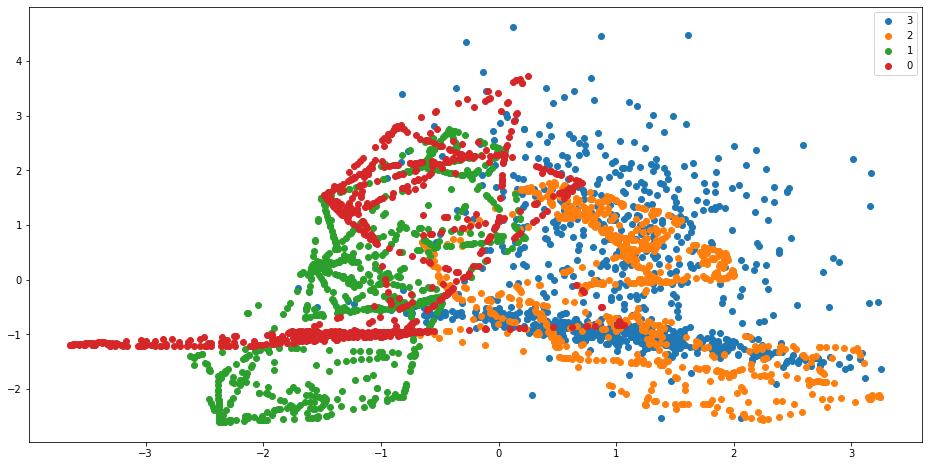

<IPython.core.display.Javascript object>

In [35]:
plt.figure(1, figsize=(16, 8))
for label, _ in counter.items():
    row = np.where(y == label)[0]
    plt.scatter(X[row, 0], X[row, 1], label=str(label))
plt.legend()

We can see now more examples in the minority classes created along the lines between the original examples in the minority classes.

We can also undersample the majority class with RandomUnderSampler

In [36]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


<IPython.core.display.Javascript object>

In [42]:
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [("o", oversample), ("u", undersample)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)

<IPython.core.display.Javascript object>

In [43]:
counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100
    print(f"Class={k}, n={v} ({dist}%)")

Class=0, n=900 (25.0%)
Class=1, n=900 (25.0%)
Class=2, n=900 (25.0%)
Class=3, n=900 (25.0%)


<IPython.core.display.Javascript object>

In [44]:
# define model
model = DecisionTreeClassifier()
scores = cross_validate(model, X, y, cv=6, n_jobs=-1, scoring="f1_macro")

<IPython.core.display.Javascript object>

In [45]:
scores

{'fit_time': array([0.00774121, 0.00855279, 0.00913095, 0.00938201, 0.00873113,
        0.00884199]),
 'score_time': array([0.00105882, 0.00160408, 0.00153232, 0.00173593, 0.00180364,
        0.00150681]),
 'test_score': array([0.93492841, 0.93495662, 0.94146685, 0.94306009, 0.92160981,
        0.92501533])}

<IPython.core.display.Javascript object>